# Load the loss values on subsets

In [1]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2

In [11]:
from methylVA.utils.common import load_config
from methylVA.data_processing.utils import load_data_tensor, load_train_test_data, sample_data
from methylVA.plots.loss_convergence import plot_training_and_validation_losses
import numpy as np

config = load_config("../methylVA/configs/random_data_zero_config.yaml")

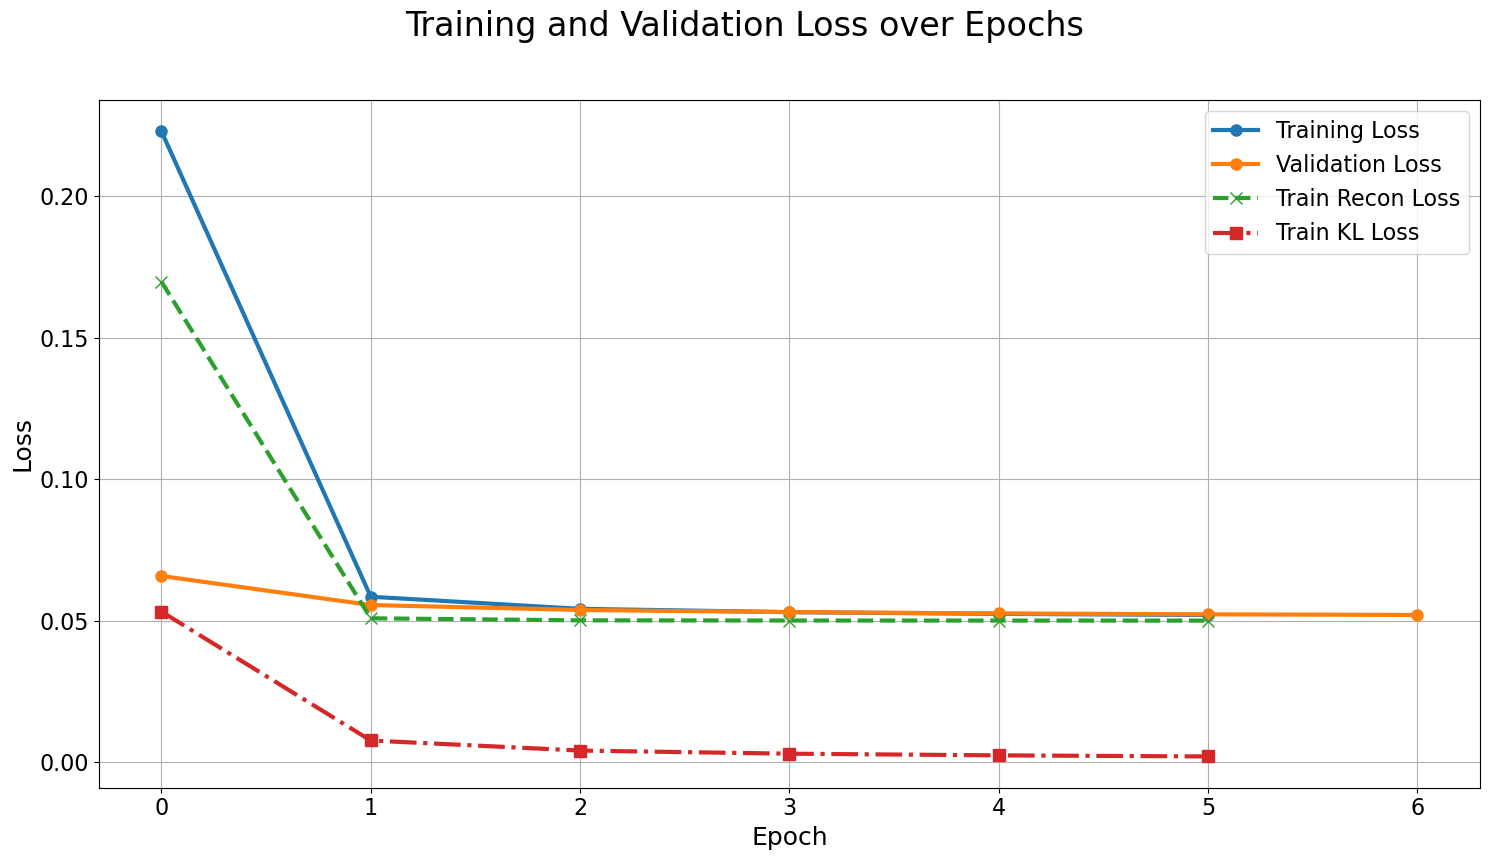

In [3]:
file_path = "../experiments/random_data_zero_vae/vae/version_0/metrics.csv"
plot_training_and_validation_losses(file_path)

In [4]:
config_training = config['training_vae']
train_loader, val_loader, test_loader = load_data_tensor(config_training)


In [5]:
from methylVA.training.load_vae import load_trained_vae

hparams_path = '../experiments/random_data_zero_vae/vae/version_0/hparams.yaml'  # Replace with the correct path
checkpoint_path = "../experiments/random_data_zero_vae/vae/version_0/checkpoints/vae-epoch=07-val_loss=0.05.ckpt"

vae_model = load_trained_vae(checkpoint_path, hparams_path)

In [7]:

X_train, y_train, X_val, y_val, X_test, y_test = load_train_test_data(config_training)
# Convert training data to NumPy array if it's a DataFrame
if hasattr(X_train, 'values'):
    X_train = X_train.values
if hasattr(X_val, 'values'):
    X_val = X_val.values
if hasattr(X_test, 'values'):
    X_test = X_test.values



In [8]:
from methylVA.training.trainer_utils import reconstruct_data, correlation_between_rows
# Reconstruct selected rows of training data
original_matrix, reconstructed_matrix = reconstruct_data(vae_model, X_train, num_rows=10)

# Print the original and reconstructed matrices
print("Original Matrix:\n", original_matrix)
print("Reconstructed Matrix:\n", reconstructed_matrix)


Original Matrix:
 [[ 0.          0.          0.         ... -0.57030208 -0.28281668
   1.11659775]
 [ 0.          0.          0.         ...  1.78718573  0.95589734
  -0.16335681]
 [ 0.          0.          0.         ...  1.27330407  1.35686545
   0.37270819]
 ...
 [ 0.          0.          0.         ...  0.20464296 -0.94659825
  -0.37488782]
 [ 0.          0.          0.         ...  0.7532192  -0.03652755
   1.22360081]
 [ 0.          0.          0.         ...  0.00647108  1.40046716
   3.28979678]]
Reconstructed Matrix:
 [[0.00222049 0.00221948 0.0025393  ... 0.00379079 0.0237222  0.00345476]
 [0.00191128 0.00189694 0.00232771 ... 0.00313948 0.01972684 0.00293773]
 [0.0014816  0.00178072 0.00172287 ... 0.00286318 0.01743142 0.00263055]
 ...
 [0.00213409 0.0023504  0.00231057 ... 0.00368413 0.01944328 0.00350885]
 [0.0015204  0.00156297 0.00190133 ... 0.00280746 0.01701991 0.00246071]
 [0.00191679 0.0020492  0.00241158 ... 0.0031738  0.02175511 0.00315072]]


In [9]:
cor = correlation_between_rows(original_matrix, reconstructed_matrix)


In [12]:
print(f"maximum correlation: {np.max(cor)}")
print(f"median correlation: {np.median(cor)}")

maximum correlation: 0.05938853261730531
median correlation: 0.030088668645882777


0.2 drop_out

maximum correlation: 0.025403004727198926

median correlation: 0.016188194530154198